In [323]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, r2_score, accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import xgboost as xgb
import pickle
from random import random 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
from imblearn.pipeline import make_pipeline
import imblearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from time import time
sns.set_style("darkgrid")
sns.set_theme(style='darkgrid',context='talk')

#### Make a baseline prediction of the 2019-2020 season

In [3]:
df_2019 = pd.read_csv('data\game_results_2019.csv')

In [8]:
df_2019 = df_2019[df_2019['game_date'] > '2019-11-14']

In [4]:
df_2019.head()

,game_date,home_team,away_team,home_score,away_score,period,home_wins,home_losses,home_otl,away_wins,away_losses,away_otl,winner,home_games_played,away_games_played,season,home_points,away_points,Point %_x,CF%_x,FF%_x,SF%_x,GF%_x,xGF%_x,SCF%_x,SCGF%_x,SCSH%_x,SCSV%_x,HDCF%_x,HDGF%_x,HDSH%_x,HDSV%_x,LDCF%_x,LDGF%_x,LDSH%_x,LDSV%_x,SH%_x,SV%_x,PDO_x,Point %_y,CF%_y,FF%_y,SF%_y,GF%_y,xGF%_y,SCF%_y,SCGF%_y,SCSH%_y,SCSV%_y,HDCF%_y,HDGF%_y,HDSH%_y,HDSV%_y,LDCF%_y,LDGF%_y,LDSH%_y,LDSV%_y,SH%_y,SV%_y,PDO_y
0,2019-11-01,New Jersey Devils,Philadelphia Flyers,3,4,SO,2,5,3,5,5,1,0,10,11,2019-2020,7,11,0.350,49.22,49.81,51.86,40.58,52.84,50.32,37.50,12.88,76.35,54.30,37.50,15.38,69.23,47.02,50.00,4.76,95.24,9.15,85.56,0.947,0.500,56.06,55.21,55.32,49.32,54.52,55.95,51.79,14.50,83.73,56.75,45.95,15.18,77.01,57.63,43.75,4.35,92.24,9.35,88.10,0.975
1,2019-11-01,New York Islanders,Tampa Bay Lightning,5,2,3rd,8,3,0,6,4,2,1,11,12,2019-2020,16,14,0.727,44.69,46.62,46.77,55.00,48.75,45.09,51.11,14.11,88.11,51.17,55.56,18.69,83.16,43.61,64.29,7.44,96.53,10.86,92.20,1.031,0.583,46.93,45.98,46.11,49.40,46.22,47.46,48.57,16.59,84.28,47.77,46.34,20.88,79.05,45.14,54.55,4.29,97.19,11.17,90.21,1.014
2,2019-11-01,Washington Capitals,Buffalo Sabres,6,1,3rd,9,2,3,9,2,2,1,14,13,2019-2020,21,20,0.750,50.12,51.04,49.65,53.54,53.80,50.74,49.38,17.62,81.86,50.00,48.08,23.15,77.87,50.27,66.67,5.62,97.22,12.38,89.40,1.018,0.769,48.21,48.16,47.46,57.33,47.90,48.27,58.33,16.67,89.32,48.93,56.76,20.00,85.32,48.17,57.14,4.91,96.51,10.94,92.64,1.036
3,2019-11-01,Carolina Hurricanes,Detroit Red Wings,7,3,3rd,8,3,1,4,8,1,1,12,13,2019-2020,17,9,0.708,51.62,52.25,52.56,55.88,51.52,52.31,55.17,15.31,86.24,55.56,56.10,20.00,80.65,52.40,60.00,3.64,97.16,9.74,91.48,1.012,0.346,48.75,50.18,48.51,39.47,48.91,49.38,35.09,9.76,82.21,48.61,37.84,14.00,77.88,47.88,53.33,4.62,96.62,7.39,89.33,0.967
4,2019-11-01,St Louis Blues,Columbus Blue Jackets,4,3,OT,7,3,3,5,5,2,1,13,12,2019-2020,17,12,0.654,47.67,47.98,48.32,50.00,43.61,47.82,52.83,14.74,88.84,39.43,44.44,15.00,87.50,47.80,47.83,6.75,92.41,10.43,90.25,1.007,0.500,49.41,50.40,51.37,41.89,51.77,48.16,42.62,13.07,81.18,48.65,44.44,18.18,76.74,49.36,38.46,3.01,95.35,7.87,88.47,0.963


In [9]:
# add win%
df_2019['home_win%'] = df_2019['home_wins'] / df_2019['home_games_played']
df_2019['away_win%'] = df_2019['away_wins'] / df_2019['away_games_played']

In [10]:
# In data exploration, found that the home team wins 55% of the time. Predict that the team with more points will win the game. If tied in win%, predict team with more wins will win.
# If tied again, 55% home team will win.
df_2019.loc[(df_2019['home_win%'] > df_2019['away_win%']), 'prediction'] = 1
df_2019.loc[(df_2019['home_win%'] == df_2019['away_win%']) & (df_2019['home_wins'] > df_2019['away_wins']), 'prediction'] = 1
df_2019.loc[(df_2019['home_win%'] == df_2019['away_win%']) & (df_2019['home_wins'] < df_2019['away_wins']), 'prediction'] = 0
df_2019.loc[(df_2019['home_win%'] == df_2019['away_win%']) & (df_2019['home_wins'] == df_2019['away_wins']), 'prediction'] = (1 if random() > 0.55 else 0)
df_2019.loc[(df_2019['home_win%'] < df_2019['away_win%']), 'prediction'] = 0
df_2019['prediction'] = df_2019['prediction'].astype(int)

In [11]:
print("Accuracy:",accuracy_score(df_2019['winner'],df_2019['prediction']))
print("Precision:",precision_score(df_2019['winner'],df_2019['prediction']))
print("Recall:",recall_score(df_2019['winner'],df_2019['prediction']))
print("F1:",f1_score(df_2019['winner'],df_2019['prediction']))

Accuracy: 0.5564005069708492
Precision: 0.5831202046035806
Recall: 0.5493975903614458
F1: 0.5657568238213401


In [627]:
cnf_matrix_baseline = confusion_matrix(df_2019['winner'],df_2019['prediction'])

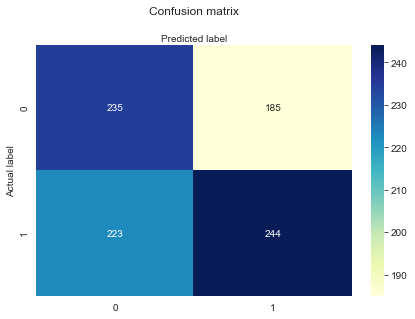

In [628]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_baseline), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### Modelling

In [243]:
df = pd.read_csv('data\game_results_2011_2018.csv')

In [244]:
# Add winning percentage
df['home_win%'] = df['home_wins'] / df['home_games_played']
df['away_win%'] = df['away_wins'] / df['away_games_played']

# Drop a couple of columns that wont be needed for making a prediction. Drop period, game date, home_games_played, away_games_played, home_points, away_points, home_score, away_score
df.drop(['period','game_date','home_games_played','away_games_played','home_points','away_points','home_score','away_score',
         'home_wins','home_losses','home_otl','away_wins','away_losses','away_otl'],axis=1,inplace=True)

In [245]:
df.head(1)

,home_team,away_team,winner,season,Point %_x,CF%_x,FF%_x,SF%_x,GF%_x,xGF%_x,SCF%_x,SCGF%_x,SCSH%_x,SCSV%_x,HDCF%_x,HDGF%_x,HDSH%_x,HDSV%_x,LDCF%_x,LDGF%_x,LDSH%_x,LDSV%_x,SH%_x,SV%_x,PDO_x,Point %_y,CF%_y,FF%_y,SF%_y,GF%_y,xGF%_y,SCF%_y,SCGF%_y,SCSH%_y,SCSV%_y,HDCF%_y,HDGF%_y,HDSH%_y,HDSV%_y,LDCF%_y,LDGF%_y,LDSH%_y,LDSV%_y,SH%_y,SV%_y,PDO_y,home_win%,away_win%
0,Boston Bruins,Ottawa Senators,1,2011-2012,0.3,55.61,53.56,52.93,45.65,50.78,52.36,41.03,9.52,87.29,52.15,46.15,13.48,82.05,58.38,71.43,3.38,98.04,6.29,91.58,0.979,0.583,52.31,51.49,50.61,44.44,54.79,53.66,49.28,16.11,81.68,54.55,45.1,20.72,71.43,51.49,18.18,1.27,94.51,9.63,87.67,0.973,0.3,0.583333


In [246]:
def diff_respect_home(df):
    df['Point %'] = df['Point %_x'] - df['Point %_y']
    df['win%'] = df['home_win%'] - df['away_win%']
    df['CF%'] = df['CF%_x'] - df['CF%_y']
    df['FF%'] = df['FF%_x'] - df['FF%_y']
    df['SF%'] = df['SF%_x'] - df['SF%_y']
    df['GF%'] = df['GF%_x'] - df['GF%_y']
    df['xGF%'] = df['xGF%_x'] - df['xGF%_y']
    df['SCF%'] = df['SCF%_x'] - df['SCF%_y']
    df['SCGF%'] = df['SCGF%_x'] - df['SCGF%_y']
    df['SCSH%'] = df['SCSH%_x'] - df['SCSH%_y']
    df['SCSV%'] = df['SCSV%_x'] - df['SCSV%_y']
    df['HDCF%'] = df['HDCF%_x'] - df['HDCF%_y']
    df['HDGF%'] = df['HDGF%_x'] - df['HDGF%_y']
    df['HDSH%'] = df['HDSH%_x'] - df['HDSH%_y']
    df['HDSV%'] = df['HDSV%_x'] - df['HDSV%_y']
    df['LDCF%'] = df['LDCF%_x'] - df['LDCF%_y']
    df['LDGF%'] = df['LDGF%_x'] - df['LDGF%_y']
    df['LDSH%'] = df['LDSH%_x'] - df['LDSH%_y']
    df['LDSV%'] = df['LDSV%_x'] - df['LDSV%_y']
    df['SH%'] = df['SH%_x'] - df['SH%_y']
    df['SV%'] = df['SV%_x'] - df['SV%_y']
    df['PDO'] = df['PDO_x'] - df['PDO_y']
    df.drop(['Point %_x','CF%_x','FF%_x','SF%_x','GF%_x','xGF%_x','SCF%_x','SCGF%_x','SCSH%_x','SCSV%_x','HDCF%_x','HDGF%_x','HDSH%_x','HDSV%_x','LDCF%_x','LDGF%_x','LDSH%_x','LDSV%_x','SH%_x','SV%_x','PDO_x','home_win%',
             'Point %_y','CF%_y','FF%_y','SF%_y','GF%_y','xGF%_y','SCF%_y','SCGF%_y','SCSH%_y','SCSV%_y','HDCF%_y','HDGF%_y','HDSH%_y','HDSV%_y','LDCF%_y','LDGF%_y','LDSH%_y','LDSV%_y','SH%_y','SV%_y','PDO_y','away_win%'],axis=1,inplace=True)
    return df

In [247]:
diff_respect_home(df)

,home_team,away_team,winner,season,Point %,win%,CF%,FF%,SF%,GF%,xGF%,SCF%,SCGF%,SCSH%,SCSV%,HDCF%,HDGF%,HDSH%,HDSV%,LDCF%,LDGF%,LDSH%,LDSV%,SH%,SV%,PDO
0,Boston Bruins,Ottawa Senators,1,2011-2012,-0.283,-0.283333,3.30,2.07,2.32,1.21,-4.01,-1.30,-8.25,-6.59,5.61,-2.40,1.05,-7.24,10.62,6.89,53.25,2.11,3.53,-3.34,3.91,0.006
1,Carolina Hurricanes,Tampa Bay Lightning,1,2011-2012,-0.045,-0.090909,1.33,0.02,-0.59,-4.84,-2.34,1.61,-3.02,-1.74,-1.08,-4.21,-5.88,-0.72,0.80,-0.79,-10.44,-0.72,-0.21,-1.41,-0.17,-0.016
2,Washington Capitals,Anaheim Ducks,1,2011-2012,0.278,0.323232,2.93,3.42,0.88,15.90,4.29,1.88,11.17,5.03,1.14,1.32,6.66,5.89,0.84,2.38,31.38,7.15,-1.14,4.87,0.87,0.057
3,Detroit Red Wings,Minnesota Wild,0,2011-2012,0.006,0.155556,10.06,10.73,11.19,2.55,8.01,4.60,7.23,-0.51,1.37,9.64,23.16,-1.52,10.52,12.99,-10.00,0.88,-4.45,-0.81,-2.01,-0.028
4,Calgary Flames,Vancouver Canucks,0,2011-2012,0.000,-0.010101,-10.30,-8.51,-8.29,-0.32,-5.41,-6.57,7.60,3.11,2.01,-9.46,3.85,2.24,4.21,-14.96,-39.29,-4.05,1.71,0.97,2.02,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7057,Dallas Stars,Minnesota Wild,1,2018-2019,0.050,0.061728,-2.23,-2.63,-2.61,3.01,-1.85,-2.55,2.56,-1.66,5.11,-3.47,7.46,0.08,8.55,-2.24,8.39,1.38,0.17,0.06,1.89,0.019
7058,Calgary Flames,Edmonton Oilers,0,2018-2019,0.185,0.197531,5.25,5.09,5.59,11.13,6.54,4.25,9.34,0.85,2.00,5.31,12.94,4.08,2.07,5.69,13.53,1.13,-0.29,1.42,0.85,0.023
7059,Arizona Coyotes,Winnipeg Jets,0,2018-2019,-0.068,-0.086420,0.87,1.34,1.90,-3.53,1.97,0.62,-3.64,-3.22,0.21,0.30,-8.37,-7.34,1.15,1.00,-0.87,-0.50,0.15,-2.25,0.20,-0.021
7060,Los Angeles Kings,Vegas Golden Knights,1,2018-2019,-0.148,-0.160494,-6.57,-6.92,-6.30,-9.23,-8.53,-7.69,-9.41,0.58,-1.77,-8.76,-9.14,0.20,-0.02,-6.13,-10.09,-0.60,-0.14,-0.42,-0.67,-0.011


In [248]:
df.head(1)

,home_team,away_team,winner,season,Point %,win%,CF%,FF%,SF%,GF%,xGF%,SCF%,SCGF%,SCSH%,SCSV%,HDCF%,HDGF%,HDSH%,HDSV%,LDCF%,LDGF%,LDSH%,LDSV%,SH%,SV%,PDO
0,Boston Bruins,Ottawa Senators,1,2011-2012,-0.283,-0.283333,3.3,2.07,2.32,1.21,-4.01,-1.3,-8.25,-6.59,5.61,-2.4,1.05,-7.24,10.62,6.89,53.25,2.11,3.53,-3.34,3.91,0.006


In [249]:
# try: drop teams and season
df.drop(['home_team','away_team','season'],axis=1,inplace=True)

In [202]:
# le = LabelEncoder()
# df['home_team'] = le.fit_transform(df['home_team'])
# df['away_team'] = le.fit_transform(df['away_team'])

In [203]:
# df.drop(['season'],axis=1,inplace=True)

In [ ]:
# One hot encode home_team, away_team and season
# one_hot = pd.get_dummies(df[['home_team','away_team','season']])
# df = pd.concat([df,one_hot],axis=1)
# df.drop(['home_team','away_team','season'],axis=1,inplace=True)

In [250]:
# Split data to train and test
X = df.drop('winner',axis=1)
y = df['winner']

In [251]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale = pd.DataFrame(X_scale,columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scale,y,test_size=0.2,random_state=30)

#### XGB

In [79]:
params = {
    'leaning_rate': [0.001,0.01,0.1,0.2],
    'max_depth': [3,5,7,9],
    'n_estimators': [50,100,150,200,250,300]
}
n=5

In [80]:
xgb = XGBClassifier(objective='reg:logistic',colsample_bytree = 0.3, learning_rate = 0.3, max_depth=9,alpha=10,n_estimators=400)
grid = GridSearchCV(estimator=xgb,param_grid=params,cv=n,scoring='accuracy',verbose=1,n_jobs=-1)

In [81]:
grid_results = grid.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[11:54:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { leaning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\Patrick\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [82]:
best_xgb_score = grid_results.best_score_
best_xgb_params = grid_results.best_params_
print('Best Score:',best_xgb_score)
print('Best Params:',best_xgb_params)

Best Score: 0.553549934549331
Best Params: {'leaning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}


In [83]:
grid_pred = grid.predict(X_test)

In [84]:
print("Accuracy:",metrics.accuracy_score(y_test, grid_pred))
print("Precision:",metrics.precision_score(y_test, grid_pred))
print("Recall:",metrics.recall_score(y_test, grid_pred))
print("F1:",metrics.f1_score(y_test, grid_pred))

Accuracy: 0.5746638358103326
Precision: 0.599791013584117
Recall: 0.7247474747474747
F1: 0.6563750714694111


In [46]:
cnf_matrix = confusion_matrix(y_test,grid_pred)

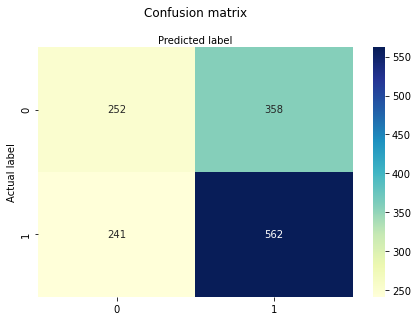

In [47]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### SVC

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X_scale,y,test_size=0.2,random_state=17)

In [250]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [251]:
print("Accuracy:",metrics.accuracy_score(y_test, svc_pred))
print("Precision:",metrics.precision_score(y_test, svc_pred))
print("Recall:",metrics.recall_score(y_test, svc_pred))
print("F1:",metrics.f1_score(y_test, svc_pred))

Accuracy: 0.5767869780608634
Precision: 0.5852059925093633
Recall: 0.8012820512820513
F1: 0.6764069264069265


#### Random Forest

In [256]:
forest_params = {
    'max_depth': [4,5,6,7,8,9],
    'n_estimators': [100,150, 200,250,275,300,325,350,400]
}
n=5

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X_scale,y,test_size=0.2,random_state=127)

In [258]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10)
grid_forest = GridSearchCV(estimator=rf,param_grid=forest_params,cv=n,scoring='accuracy',verbose=1,n_jobs=-1)
forest_results = grid_forest.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [259]:
forest_pred = forest_results.predict(X_test)
best_forest_score = forest_results.best_score_
best_forest_params = forest_results.best_params_
print('Best Score:',best_forest_score)
print('Best Params:',best_forest_params)

Best Score: 0.5689487917101045
Best Params: {'max_depth': 4, 'n_estimators': 275}


In [260]:
print("Accuracy:",metrics.accuracy_score(y_test, forest_pred))
print("Precision:",metrics.precision_score(y_test, forest_pred))
print("Recall:",metrics.recall_score(y_test, forest_pred))
print("F1:",metrics.f1_score(y_test, forest_pred))

Accuracy: 0.5973106864826611
Precision: 0.6114965312190287
Recall: 0.7770780856423174
F1: 0.6844148641153632


In [608]:
#save model with pickle 
# filename = 'grid_forest.sav'
# pickle.dump(grid_forest,open(filename,'wb'))

In [278]:
#load model with pickle , state 127
forest_results = pickle.load(open('grid_forest.sav','rb'))

In [469]:
feature_imp = forest_results.best_estimator_.feature_importances_
feature_imp = {'feature_importance':feature_imp}
features_df = pd.DataFrame(feature_imp,index=X_train.columns)
features_df.sort_values(by='feature_importance',ascending=False,inplace=True)

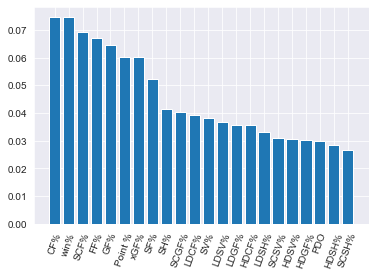

In [470]:
pyplot.bar(features_df.index,features_df['feature_importance'])
plt.xticks(rotation=70)
pyplot.show()

### Using entire dataset to predict the 2019-2020 season

In [262]:
df_2019_test = pd.read_csv('data\game_results_2019.csv')
df_all = pd.read_csv('data\game_results_2011_2018.csv')

In [263]:
df_2019_test['game_date'] = pd.to_datetime(df_2019_test['game_date'])

In [264]:
df_2019_test = df_2019_test[df_2019_test['game_date'] > '2019-11-14']

In [265]:
# Add winning percentage
df_all['home_win%'] = df_all['home_wins'] / df_all['home_games_played']
df_all['away_win%'] = df_all['away_wins'] / df_all['away_games_played']

# Drop a couple of columns that wont be needed for making a prediction. Drop period, game date, home_games_played, away_games_played, home_points, away_points, home_score, away_score
df_all.drop(['period','game_date','home_games_played','away_games_played','home_points','away_points','home_score','away_score',
         'home_wins','home_losses','home_otl','away_wins','away_losses','away_otl'],axis=1,inplace=True)

# Add winning percentage
df_2019_test['home_win%'] = df_2019_test['home_wins'] / df_2019_test['home_games_played']
df_2019_test['away_win%'] = df_2019_test['away_wins'] / df_2019_test['away_games_played']

# Drop a couple of columns that wont be needed for making a prediction. Drop period, game date, home_games_played, away_games_played, home_points, away_points, home_score, away_score
df_2019_test.drop(['period','game_date','home_games_played','away_games_played','home_points','away_points','home_score','away_score',
         'home_wins','home_losses','home_otl','away_wins','away_losses','away_otl'],axis=1,inplace=True)

In [266]:
df_all = df_all.append(df_2019_test)

In [267]:
season = df_all['season']

In [268]:
# try: drop teams and season
df_all.drop(['home_team','away_team','season'],axis=1,inplace=True)

In [269]:
diff_respect_home(df_all)

,winner,Point %,win%,CF%,FF%,SF%,GF%,xGF%,SCF%,SCGF%,SCSH%,SCSV%,HDCF%,HDGF%,HDSH%,HDSV%,LDCF%,LDGF%,LDSH%,LDSV%,SH%,SV%,PDO
0,1,-0.283,-0.283333,3.30,2.07,2.32,1.21,-4.01,-1.30,-8.25,-6.59,5.61,-2.40,1.05,-7.24,10.62,6.89,53.25,2.11,3.53,-3.34,3.91,0.006
1,1,-0.045,-0.090909,1.33,0.02,-0.59,-4.84,-2.34,1.61,-3.02,-1.74,-1.08,-4.21,-5.88,-0.72,0.80,-0.79,-10.44,-0.72,-0.21,-1.41,-0.17,-0.016
2,1,0.278,0.323232,2.93,3.42,0.88,15.90,4.29,1.88,11.17,5.03,1.14,1.32,6.66,5.89,0.84,2.38,31.38,7.15,-1.14,4.87,0.87,0.057
3,0,0.006,0.155556,10.06,10.73,11.19,2.55,8.01,4.60,7.23,-0.51,1.37,9.64,23.16,-1.52,10.52,12.99,-10.00,0.88,-4.45,-0.81,-2.01,-0.028
4,0,0.000,-0.010101,-10.30,-8.51,-8.29,-0.32,-5.41,-6.57,7.60,3.11,2.01,-9.46,3.85,2.24,4.21,-14.96,-39.29,-4.05,1.71,0.97,2.02,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,1,0.050,0.028986,-1.36,-1.54,-2.26,3.95,-1.60,-1.12,2.67,0.13,1.85,-2.47,2.26,2.06,1.15,-2.38,5.38,0.52,1.01,0.64,1.70,0.023
883,0,0.036,0.014286,-2.30,-1.13,-1.28,-0.07,1.63,-0.15,0.62,1.73,-1.05,6.36,6.89,0.81,0.75,-5.27,-5.51,-0.02,-0.36,1.21,-0.64,0.005
884,0,-0.178,-0.171429,-1.79,-1.67,-2.72,-8.92,-1.37,-2.62,-10.98,-0.82,-3.24,0.81,-8.19,-0.42,-4.28,-1.82,-3.34,-2.35,2.98,-1.57,-0.78,-0.024
885,1,0.087,0.057971,4.74,4.17,3.11,3.78,5.71,5.26,2.83,-2.00,0.89,2.54,-6.75,-4.87,-2.02,5.10,10.10,1.47,-0.34,-0.33,0.52,0.002


In [270]:
# Split data to train and test
X_all = df_all.drop('winner',axis=1)
y_all = df_all['winner']

In [271]:
scaler = StandardScaler()
X_scale_all = scaler.fit_transform(X_all)
X_scale_all = pd.DataFrame(X_scale_all,columns=X_all.columns)

In [272]:
X_scale_all.insert(2,'winner',y_all.values)

In [273]:
X_scale_all.insert(2,'season',season.values)

In [274]:
X_scale_all

,Point %,win%,season,winner,CF%,FF%,SF%,GF%,xGF%,SCF%,SCGF%,SCSH%,SCSV%,HDCF%,HDGF%,HDSH%,HDSV%,LDCF%,LDGF%,LDSH%,LDSV%,SH%,SV%,PDO
0,-1.909300,-1.771047,2011-2012,1,0.829685,0.532162,0.601227,0.196082,-0.835906,-0.271778,-1.133580,-2.785600,2.102020,-0.434280,0.150935,-1.995040,2.560958,1.456099,3.639637,1.490737,2.553092,-2.076971,2.526976,0.276170
1,-0.286348,-0.554161,2011-2012,1,0.341935,0.020367,-0.136460,-0.660890,-0.478049,0.383583,-0.401466,-0.729219,-0.399465,-0.777874,-0.693660,-0.187911,0.197452,-0.162702,-0.694797,-0.506284,-0.130668,-0.870930,-0.091695,-0.667501
2,1.916228,2.064860,2011-2012,1,0.738077,0.869198,0.236186,2.276895,0.942663,0.444390,1.584903,2.141235,0.430625,0.271890,0.834655,1.644163,0.207079,0.505475,2.151270,5.047267,-0.798021,3.053388,0.575809,2.463773
3,0.061427,1.004476,2011-2012,0,2.503386,2.694183,2.849778,0.385891,1.739805,1.056961,1.033367,-0.207704,0.516625,1.851281,2.845595,-0.409645,2.536890,2.741865,-0.664853,0.622774,-3.173221,-0.495996,-1.272664,-1.182231
4,0.020512,-0.043132,2011-2012,0,-2.537523,-2.109199,-2.088416,-0.020639,-1.135905,-1.458635,1.085161,1.327162,0.755930,-1.774485,0.492186,0.632503,1.018181,-3.149473,-2.658189,-2.856134,1.247091,0.616311,1.313915,1.305631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,0.361468,0.204050,2019-2020,1,-0.324079,-0.369096,-0.559806,0.584199,-0.319478,-0.231240,0.395042,0.063654,0.696103,-0.447568,0.298404,0.582613,0.281691,-0.497844,0.381836,0.368736,0.744783,0.410097,1.108529,1.005371
7847,0.266001,0.111089,2019-2020,0,-0.556812,-0.266737,-0.311376,0.014773,0.372664,-0.012787,0.108075,0.742048,-0.388247,1.228637,0.862686,0.236154,0.185418,-1.107002,-0.359285,-0.012321,-0.238306,0.766285,-0.393356,0.233276
7848,-1.193292,-1.063364,2019-2020,0,-0.430542,-0.401552,-0.676417,-1.238814,-0.270192,-0.569055,-1.515736,-0.339142,-1.207119,0.175076,-0.975191,-0.104761,-1.025217,-0.379807,-0.211606,-1.656511,2.158422,-0.970913,-0.483212,-1.010655
7849,0.613776,0.387353,2019-2020,1,1.186213,1.056440,0.801492,0.560118,1.246949,1.205600,0.417439,-0.839458,0.337146,0.503483,-0.799691,-1.338154,-0.481274,1.078800,0.703056,1.039114,-0.223954,-0.196048,0.351169,0.104594


In [275]:
X_scale_train = X_scale_all[X_scale_all['season'] != '2019-2020'].drop(['winner','season'],axis=1)
y_scale_train = X_scale_all[X_scale_all['season'] != '2019-2020']['winner']
X_scale_test = X_scale_all[X_scale_all['season'] == '2019-2020'].drop(['winner','season'],axis=1)
y_scale_test = X_scale_all[X_scale_all['season'] == '2019-2020']['winner']

In [276]:
X_scale_train.head(1)

,Point %,win%,CF%,FF%,SF%,GF%,xGF%,SCF%,SCGF%,SCSH%,SCSV%,HDCF%,HDGF%,HDSH%,HDSV%,LDCF%,LDGF%,LDSH%,LDSV%,SH%,SV%,PDO
0,-1.9093,-1.771047,0.829685,0.532162,0.601227,0.196082,-0.835906,-0.271778,-1.13358,-2.7856,2.10202,-0.43428,0.150935,-1.99504,2.560958,1.456099,3.639637,1.490737,2.553092,-2.076971,2.526976,0.27617


#### Random forest

In [738]:
rf2 = RandomForestClassifier(n_estimators=200, max_depth=10)
grid_forest2 = GridSearchCV(estimator=rf2,param_grid=forest_params,cv=n,scoring='accuracy',verbose=1,n_jobs=-1)

In [739]:
forest_results2 = grid_forest2.fit(X_scale_train,y_scale_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [740]:
forest_pred2 = forest_results2.predict(X_scale_test)
best_forest2_score = forest_results2.best_score_
best_forest2_params = forest_results2.best_params_
print('Best Score:',best_forest2_score)
print('Best Params:',best_forest2_params)

Best Score: 0.5747660834541259
Best Params: {'max_depth': 6, 'n_estimators': 250}


In [741]:
print("Accuracy:",metrics.accuracy_score(y_scale_test, forest_pred2))
print("Precision:",metrics.precision_score(y_scale_test, forest_pred2))
print("Recall:",metrics.recall_score(y_scale_test, forest_pred2))
print("F1:",metrics.f1_score(y_scale_test, forest_pred2))

Accuracy: 0.5602027883396705
Precision: 0.5566666666666666
Recall: 0.8048192771084337
F1: 0.6581280788177339


In [24]:
predict_prob = forest_results2.predict_proba(X_scale_test)

In [25]:
# save model with pickle
# filename = 'finalforest.sav'
# pickle.dump(grid_forest2,open(filename,'wb'))

#### SVC

In [52]:
svc2 = SVC(kernel='rbf')
svc2.fit(X_scale_train, y_scale_train)

SVC()

In [54]:
svc_pred2 = svc2.predict(X_scale_test)

In [55]:
print("Accuracy:",metrics.accuracy_score(y_scale_test, svc_pred2))
print("Precision:",metrics.precision_score(y_scale_test, svc_pred2))
print("Recall:",metrics.recall_score(y_scale_test, svc_pred2))
print("F1:",metrics.f1_score(y_scale_test, svc_pred2))

Accuracy: 0.5388951521984217
Precision: 0.5407303370786517
Recall: 0.8244111349036403
F1: 0.6530958439355387


#### SVC without full training data

In [74]:
svc_pred = svc.predict(X_scale_test)

In [75]:
print("Accuracy:",metrics.accuracy_score(y_scale_test, svc_pred))
print("Precision:",metrics.precision_score(y_scale_test, svc_pred))
print("Recall:",metrics.recall_score(y_scale_test, svc_pred))
print("F1:",metrics.f1_score(y_scale_test, svc_pred))

Accuracy: 0.552423900789177
Precision: 0.5514705882352942
Recall: 0.8029978586723768
F1: 0.6538796861377506


#### RF without full training data (the initial model)

In [624]:
forest_pred_test = forest_results.predict(X_scale_test)

In [625]:
print("Accuracy:",metrics.accuracy_score(y_scale_test, forest_pred_test))
print("Precision:",metrics.precision_score(y_scale_test, forest_pred_test))
print("Recall:",metrics.recall_score(y_scale_test, forest_pred_test))
print("F1:",metrics.f1_score(y_scale_test, forest_pred_test))

Accuracy: 0.5690747782002535
Precision: 0.5636672325976231
Recall: 0.8
F1: 0.6613545816733067


In [626]:
predict_prob = forest_results.predict_proba(X_scale_test)

### NN

In [133]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [169]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_scale_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# training model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_scale_train, y_scale_train, epochs=300, batch_size=16, verbose=1)

Epoch 1/300
442/442 [==============================] - 1s 676us/step - loss: 0.6837 - accuracy: 0.5497
Epoch 2/300
442/442 [==============================] - 0s 669us/step - loss: 0.6738 - accuracy: 0.5739
Epoch 3/300
442/442 [==============================] - 0s 662us/step - loss: 0.6754 - accuracy: 0.5731
Epoch 4/300
442/442 [==============================] - 0s 626us/step - loss: 0.6746 - accuracy: 0.5697
Epoch 5/300
442/442 [==============================] - 0s 626us/step - loss: 0.6693 - accuracy: 0.5876
Epoch 6/300
442/442 [==============================] - 0s 567us/step - loss: 0.6678 - accuracy: 0.5927
Epoch 7/300
442/442 [==============================] - 0s 553us/step - loss: 0.6704 - accuracy: 0.5803
Epoch 8/300
442/442 [==============================] - 0s 562us/step - loss: 0.6684 - accuracy: 0.5887
Epoch 9/300
442/442 [==============================] - 0s 626us/step - loss: 0.6665 - accuracy: 0.5910
Epoch 10/300
442/442 [==============================] - 0s 553us/step - l

In [170]:
accuracy = model.evaluate(X_scale_train, y_scale_train)

221/221 [==============================] - 0s 536us/step - loss: 0.4430 - accuracy: 0.7774


In [161]:
predictions = model.predict(X_scale_test)

In [171]:
predictions2 = model.predict_classes(X_scale_test)

C:\Users\Patrick\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [172]:
winners_2019 = df_2019[['game_date','home_team','away_team','winner']]

In [173]:
winners_2019['nn_prediction'] = predictions2

<ipython-input-173-09b93dcc3ca9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners_2019['nn_prediction'] = predictions2


In [174]:
winners_2019['nn_prediction'].value_counts()

1    462
0    425
Name: nn_prediction, dtype: int64

In [175]:
sum(winners_2019['winner'] == winners_2019['nn_prediction']) / float(len(winners_2019))

0.5298759864712514

### Combine results to 2019 data to make the table more clear

In [681]:
df_2019 = pd.read_csv('data\game_results_2019.csv')

In [682]:
df_2019['game_date'] = pd.to_datetime(df_2019['game_date'])
df_2019 = df_2019[df_2019['game_date'] > '2019-11-14']

In [683]:
df_2019 = df_2019[['game_date','home_team','away_team','winner']]

In [684]:
df_2019['predicted_winner'] = forest_pred_test

In [685]:
df_2019.head(1)

,game_date,home_team,away_team,winner,predicted_winner
98,2019-11-15,Toronto Maple Leafs,Boston Bruins,0,0


In [686]:
df_2019['confidence_0'] = predict_prob[:,0]
df_2019['confidence_1'] = predict_prob[:,1]

In [687]:
df_2019[:9]

,game_date,home_team,away_team,winner,predicted_winner,confidence_0,confidence_1
98,2019-11-15,Toronto Maple Leafs,Boston Bruins,0,0,0.507350,0.492650
99,2019-11-15,New Jersey Devils,Pittsburgh Penguins,1,0,0.505874,0.494126
100,2019-11-15,Washington Capitals,Montreal Canadiens,0,1,0.420292,0.579708
101,2019-11-15,Columbus Blue Jackets,St Louis Blues,1,1,0.491698,0.508302
102,2019-11-15,Ottawa Senators,Philadelphia Flyers,1,0,0.529056,0.470944
103,2019-11-16,Minnesota Wild,Carolina Hurricanes,0,0,0.543786,0.456214
104,2019-11-16,Tampa Bay Lightning,Winnipeg Jets,0,1,0.471199,0.528801
105,2019-11-16,Edmonton Oilers,Dallas Stars,0,1,0.464605,0.535395
106,2019-11-16,Arizona Coyotes,Calgary Flames,1,1,0.447592,0.552408


In [690]:
df_2019.to_csv('predicted_winners_2019.csv',index=False)

In [2]:
df_2019 = pd.read_csv('predicted_winners_2019.csv')

In [4]:
# plot the accuracy over number of games in a season
acc = []
for i in range(len(df_2019)):
    df2 = df_2019[:i+1]
    temp_acc = sum(df2['winner']==df2['predicted_winner'])/len(df2)
    acc.append(temp_acc)

In [5]:
df_2019['cum_acc'] = acc

In [299]:
df_2019

,game_date,home_team,away_team,winner,predicted_winner,confidence_0,confidence_1,cum_acc
0,2019-11-15,Toronto Maple Leafs,Boston Bruins,0,0,0.507350,0.492650,1.000000
1,2019-11-15,New Jersey Devils,Pittsburgh Penguins,1,0,0.505874,0.494126,0.500000
2,2019-11-15,Washington Capitals,Montreal Canadiens,0,1,0.420292,0.579708,0.333333
3,2019-11-15,Columbus Blue Jackets,St Louis Blues,1,1,0.491698,0.508302,0.500000
4,2019-11-15,Ottawa Senators,Philadelphia Flyers,1,0,0.529056,0.470944,0.400000
...,...,...,...,...,...,...,...,...
784,2020-03-11,Chicago Blackhawks,San Jose Sharks,1,1,0.448456,0.551544,0.568153
785,2020-03-11,Edmonton Oilers,Winnipeg Jets,0,1,0.462957,0.537043,0.567430
786,2020-03-11,Anaheim Ducks,St Louis Blues,0,0,0.538196,0.461804,0.567980
787,2020-03-11,Colorado Avalanche,New York Rangers,1,1,0.383018,0.616982,0.568528


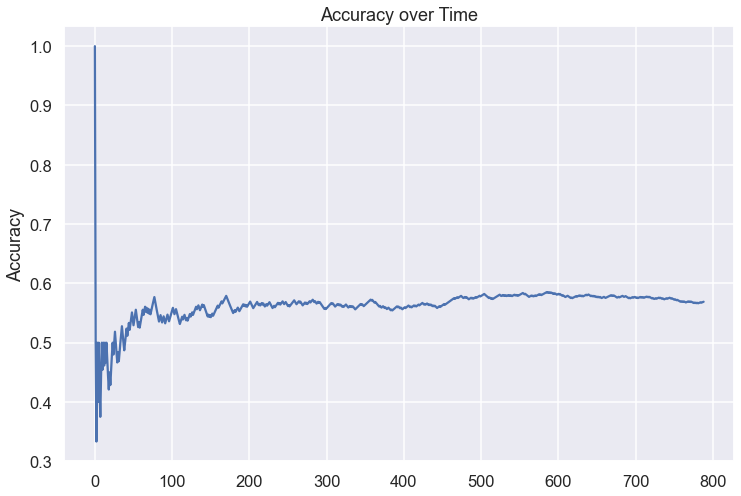

In [324]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_2019,y='cum_acc',x=df_2019.index)
plt.ylabel('Accuracy')
plt.title('Accuracy over Time')
plt.show()

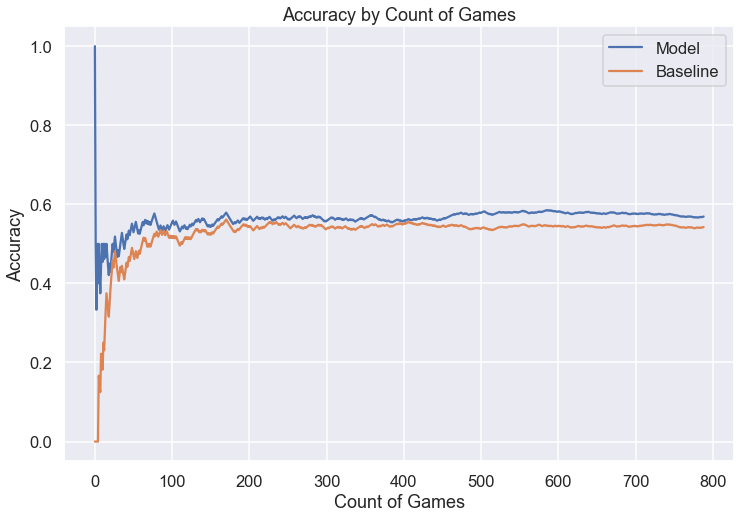

In [325]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_2019,y='cum_acc',x=df_2019.index)
sns.lineplot(data=odds_baseline,y='cum_acc',x=odds_baseline.index)
plt.legend(['Model','Baseline'])
plt.ylabel('Accuracy')
plt.xlabel('Count of Games')
plt.title('Accuracy by Count of Games')
plt.show()

### Add betting odds to table

In [217]:
odds_2019 = pd.read_csv('data/2019_nhl_betting_odds.csv')

In [64]:
l1 = list(odds_2019['home_team'].unique())
l2 = list(df_2019['home_team'].unique())

In [65]:
list(set(l1)-set(l2))

[]

In [218]:
odds_2019.loc[odds_2019['home_team'] == 'NY Rangers','home_team'] = 'New York Rangers'
odds_2019.loc[odds_2019['away_team'] == 'NY Rangers','away_team'] = 'New York Rangers'
odds_2019.loc[odds_2019['home_team'] == 'NY Islanders','home_team'] = 'New York Islanders'
odds_2019.loc[odds_2019['away_team'] == 'NY Islanders','away_team'] = 'New York Islanders'

In [37]:
import collections
collections.Counter(l1) == collections.Counter(l2)

True

In [219]:
odds_2019['game_date'] = pd.to_datetime(odds_2019['game_date'])
df_2019['game_date'] = pd.to_datetime(df_2019['game_date'])

In [220]:
odds = pd.merge(df_2019, odds_2019, on=['game_date','home_team','away_team'])

In [68]:
odds.to_csv('odds_results.csv',index=False)

In [8]:
odds = pd.read_csv('odds_results.csv')

#### Baseline model with odds

In [221]:
odds_baseline = odds.copy()

In [222]:
# Create a baseline model with odds being the predicting factor
odds_baseline.loc[(odds_baseline['home_odds'] < odds_baseline['away_odds']), 'odds_prediction'] = 1
odds_baseline.loc[(odds_baseline['home_odds'] > odds_baseline['away_odds']), 'odds_prediction'] = 0
odds_baseline.loc[(odds_baseline['home_odds'] == odds_baseline['away_odds']), 'odds_prediction'] = (1 if random() > 0.55 else 0)
odds_baseline['odds_prediction'] = odds_baseline['odds_prediction'].astype(int)

In [223]:
odds_baseline.head(1)

,game_date,home_team,away_team,winner,predicted_winner,confidence_0,confidence_1,cum_acc,home_odds,away_odds,odds_prediction
0,2019-11-15,Toronto Maple Leafs,Boston Bruins,0,0,0.50735,0.49265,1.0,2.1,2.42,1


In [224]:
print("Accuracy:",accuracy_score(odds_baseline['winner'],odds_baseline['odds_prediction']))
print("Precision:",precision_score(odds_baseline['winner'],odds_baseline['odds_prediction']))
print("Recall:",recall_score(odds_baseline['winner'],odds_baseline['odds_prediction']))
print("F1:",f1_score(odds_baseline['winner'],odds_baseline['odds_prediction']))

Accuracy: 0.5424588086185045
Precision: 0.5503731343283582
Recall: 0.7108433734939759
F1: 0.6203995793901156


In [225]:
sum(odds_baseline['winner']==odds_baseline['odds_prediction'])/len(odds_baseline)

0.5424588086185045

In [281]:
odds_baseline.head()

,game_date,home_team,away_team,winner,predicted_winner,confidence_0,confidence_1,cum_acc,home_odds,away_odds,odds_prediction
0,2019-11-15,Toronto Maple Leafs,Boston Bruins,0,0,0.507350,0.492650,1.000000,2.10,2.42,1
1,2019-11-15,New Jersey Devils,Pittsburgh Penguins,1,0,0.505874,0.494126,0.500000,2.40,2.19,0
2,2019-11-15,Washington Capitals,Montreal Canadiens,0,1,0.420292,0.579708,0.333333,1.80,3.20,1
3,2019-11-15,Columbus Blue Jackets,St Louis Blues,1,1,0.491698,0.508302,0.500000,2.45,2.18,0
4,2019-11-15,Ottawa Senators,Philadelphia Flyers,1,0,0.529056,0.470944,0.400000,2.90,1.88,0


In [296]:
# plot the accuracy over number of games in a season
acc_baseline = []
for i in range(len(odds_baseline)):
    df2 = odds_baseline[:i+1]
    temp_acc = sum(df2['winner']==df2['odds_prediction'])/len(df2)
    acc_baseline.append(temp_acc)

In [307]:
odds_baseline['cum_acc'] = acc_baseline

In [308]:
odds_baseline

,game_date,home_team,away_team,winner,predicted_winner,confidence_0,confidence_1,cum_acc,home_odds,away_odds,odds_prediction
0,2019-11-15,Toronto Maple Leafs,Boston Bruins,0,0,0.507350,0.492650,0.000000,2.10,2.42,1
1,2019-11-15,New Jersey Devils,Pittsburgh Penguins,1,0,0.505874,0.494126,0.000000,2.40,2.19,0
2,2019-11-15,Washington Capitals,Montreal Canadiens,0,1,0.420292,0.579708,0.000000,1.80,3.20,1
3,2019-11-15,Columbus Blue Jackets,St Louis Blues,1,1,0.491698,0.508302,0.000000,2.45,2.18,0
4,2019-11-15,Ottawa Senators,Philadelphia Flyers,1,0,0.529056,0.470944,0.000000,2.90,1.88,0
...,...,...,...,...,...,...,...,...,...,...,...
784,2020-03-11,Chicago Blackhawks,San Jose Sharks,1,1,0.448456,0.551544,0.541401,1.78,3.05,1
785,2020-03-11,Edmonton Oilers,Winnipeg Jets,0,1,0.462957,0.537043,0.540712,1.93,2.75,1
786,2020-03-11,Anaheim Ducks,St Louis Blues,0,0,0.538196,0.461804,0.541296,3.40,1.66,0
787,2020-03-11,Colorado Avalanche,New York Rangers,1,1,0.383018,0.616982,0.541878,1.92,2.75,1


### Calculating the profit/loss from using the baseline model, and the ML model

With a consistent bet size of $100

#### Baseline with odds favourites

In [227]:
profit_baseline = odds_baseline.copy()

In [228]:
profit_baseline.drop(['predicted_winner','confidence_0','confidence_1'],axis=1,inplace=True)

In [229]:
profit_baseline.head()

,game_date,home_team,away_team,winner,cum_acc,home_odds,away_odds,odds_prediction
0,2019-11-15,Toronto Maple Leafs,Boston Bruins,0,1.000000,2.10,2.42,1
1,2019-11-15,New Jersey Devils,Pittsburgh Penguins,1,0.500000,2.40,2.19,0
2,2019-11-15,Washington Capitals,Montreal Canadiens,0,0.333333,1.80,3.20,1
3,2019-11-15,Columbus Blue Jackets,St Louis Blues,1,0.500000,2.45,2.18,0
4,2019-11-15,Ottawa Senators,Philadelphia Flyers,1,0.400000,2.90,1.88,0


In [230]:
profit_baseline['bet_size'] = 100

In [231]:
# if correctly bets home wins
profit_baseline.loc[(profit_baseline['winner']==profit_baseline['odds_prediction']) & (profit_baseline['winner'] == 1), 'profit'] =  (profit_baseline['bet_size'] * profit_baseline['home_odds'])
# if correctly bets away wins
profit_baseline.loc[(profit_baseline['winner']==profit_baseline['odds_prediction']) & (profit_baseline['winner'] == 0), 'profit'] =  (profit_baseline['bet_size'] * profit_baseline['away_odds'])
# incorrectly guesses
profit_baseline.loc[(profit_baseline['winner'] != profit_baseline['odds_prediction']), 'profit'] = 0

In [232]:
profit_baseline['return'] = profit_baseline['profit'] - profit_baseline['bet_size']
profit_baseline['cum_return'] = profit_baseline['return'].cumsum()

In [233]:
# calculate ROI
ROI_baseline = round((((profit_baseline['return'].sum()) / profit_baseline['bet_size'].sum()) * 100),2)
print(f'The ROI is: {ROI_baseline}%')

The ROI is: -1.01%


In [234]:
profit_baseline

,game_date,home_team,away_team,winner,cum_acc,home_odds,away_odds,odds_prediction,bet_size,profit,return,cum_return
0,2019-11-15,Toronto Maple Leafs,Boston Bruins,0,1.000000,2.10,2.42,1,100,0.0,-100.0,-100.0
1,2019-11-15,New Jersey Devils,Pittsburgh Penguins,1,0.500000,2.40,2.19,0,100,0.0,-100.0,-200.0
2,2019-11-15,Washington Capitals,Montreal Canadiens,0,0.333333,1.80,3.20,1,100,0.0,-100.0,-300.0
3,2019-11-15,Columbus Blue Jackets,St Louis Blues,1,0.500000,2.45,2.18,0,100,0.0,-100.0,-400.0
4,2019-11-15,Ottawa Senators,Philadelphia Flyers,1,0.400000,2.90,1.88,0,100,0.0,-100.0,-500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
784,2020-03-11,Chicago Blackhawks,San Jose Sharks,1,0.568153,1.78,3.05,1,100,178.0,78.0,-938.0
785,2020-03-11,Edmonton Oilers,Winnipeg Jets,0,0.567430,1.93,2.75,1,100,0.0,-100.0,-1038.0
786,2020-03-11,Anaheim Ducks,St Louis Blues,0,0.567980,3.40,1.66,0,100,166.0,66.0,-972.0
787,2020-03-11,Colorado Avalanche,New York Rangers,1,0.568528,1.92,2.75,1,100,192.0,92.0,-880.0


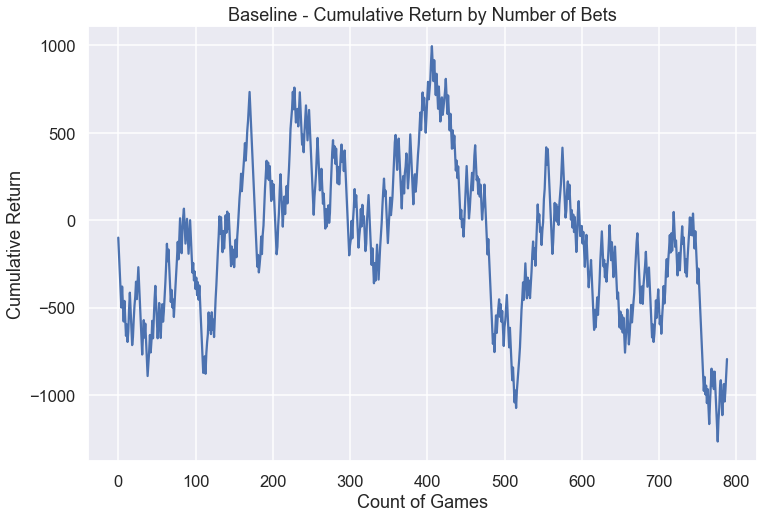

In [326]:
plt.figure(figsize=(12,8))
sns.lineplot(data=profit_baseline,y='cum_return',x=profit_baseline.index)
plt.ylabel('Cumulative Return')
plt.xlabel('Count of Games')
plt.title('Baseline - Cumulative Return by Number of Bets')
plt.show()

#### Model

In [235]:
profit_model = odds_baseline.copy()

In [236]:
profit_model.drop(['odds_prediction'],axis=1,inplace=True)

In [237]:
profit_model['bet_size'] = 100

In [238]:
# if correctly bets home wins
profit_model.loc[(profit_model['winner']==profit_model['predicted_winner']) & (profit_model['winner'] == 1), 'profit'] =  (profit_model['bet_size'] * profit_model['home_odds'])
# if correctly bets away wins
profit_model.loc[(profit_model['winner']==profit_model['predicted_winner']) & (profit_model['winner'] == 0), 'profit'] =  (profit_model['bet_size'] * profit_model['away_odds'])
# incorrectly guesses
profit_model.loc[(profit_model['winner'] != profit_model['predicted_winner']), 'profit'] = 0

In [239]:
profit_model['return'] = profit_model['profit'] - profit_model['bet_size']
profit_model['cum_return'] = profit_model['return'].cumsum()

In [240]:
# calculate ROI
ROI_baseline = round((((profit_model['return'].sum()) / profit_model['bet_size'].sum()) * 100),2)
print(f'The ROI is: {ROI_baseline}%')

The ROI is: 7.78%


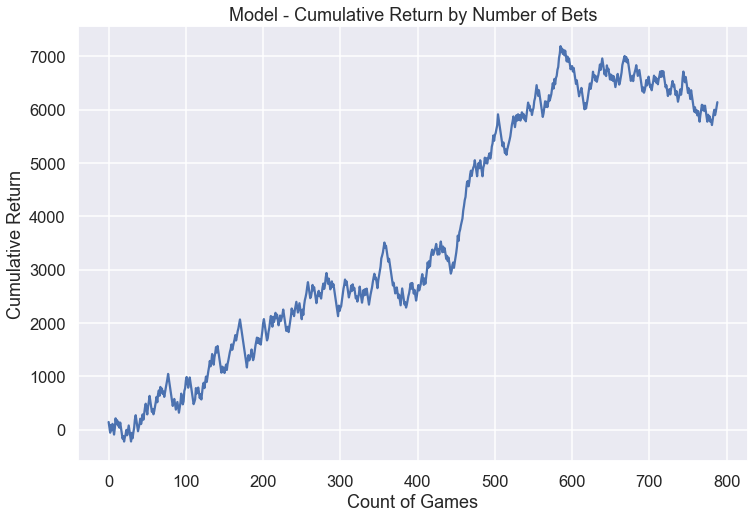

In [327]:
plt.figure(figsize=(12,8))
sns.lineplot(data=profit_model,y='cum_return',x=profit_model.index)
plt.ylabel('Cumulative Return')
plt.xlabel('Count of Games')
plt.title('Model - Cumulative Return by Number of Bets')
plt.show()

In [90]:
profit_model

,game_date,home_team,away_team,winner,predicted_winner,confidence_0,confidence_1,cum_acc,home_odds,away_odds,bet_size,profit,return,cum_return
0,2019-11-15,Toronto Maple Leafs,Boston Bruins,0,0,0.507350,0.492650,1.000000,2.10,2.42,100,242.0,142.0,142.0
1,2019-11-15,New Jersey Devils,Pittsburgh Penguins,1,0,0.505874,0.494126,0.500000,2.40,2.19,100,0.0,-100.0,42.0
2,2019-11-15,Washington Capitals,Montreal Canadiens,0,1,0.420292,0.579708,0.333333,1.80,3.20,100,0.0,-100.0,-58.0
3,2019-11-15,Columbus Blue Jackets,St Louis Blues,1,1,0.491698,0.508302,0.500000,2.45,2.18,100,245.0,145.0,87.0
4,2019-11-15,Ottawa Senators,Philadelphia Flyers,1,0,0.529056,0.470944,0.400000,2.90,1.88,100,0.0,-100.0,-13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2020-03-11,Chicago Blackhawks,San Jose Sharks,1,1,0.448456,0.551544,0.568153,1.78,3.05,100,178.0,78.0,5701.0
785,2020-03-11,Edmonton Oilers,Winnipeg Jets,0,1,0.462957,0.537043,0.567430,1.93,2.75,100,0.0,-100.0,5601.0
786,2020-03-11,Anaheim Ducks,St Louis Blues,0,0,0.538196,0.461804,0.567980,3.40,1.66,100,166.0,66.0,5667.0
787,2020-03-11,Colorado Avalanche,New York Rangers,1,1,0.383018,0.616982,0.568528,1.92,2.75,100,192.0,92.0,5759.0
